<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Привет!👋</b> 
    
Подскажи, как я могу к тебе обрщаться? В недрах Практикума не увидел твоего имени.

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

     
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose

Сначала я импортировала данные обычным способом и проверила на наличие пропусков; убедившись, что их нет, переписала загрузку файла с конвертацией столбца времени в индексы.

In [2]:
try:
    data = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Описание задачи есть, библиотеки загружены. Данные получены верно, даты обработаны, мы их переместили в индекс. Полет нормальный :)
</div>
 

Данные идут с шагом в 10 минут. Проверяем порядок времени по индексам.

In [4]:
display(data.index.is_monotonic)
data.info()

True

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Индексы расположены по порядку, пропусков нет, тип данных верен. Приступаем к анализу.

## Анализ

Находим границы диапазона данных.

In [5]:
print('Начало данных:', data.index.min())
print('Конец данных:', data.index.max())

Начало данных: 2018-03-01 00:00:00
Конец данных: 2018-08-31 23:50:00


Поскольку 10 минут - слишком малый шаг, выполняем ресемплирование до 1 часа.

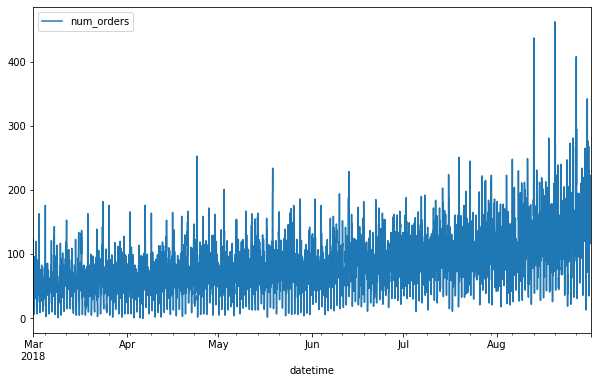

In [6]:
data = data.resample('1H').sum()
data.plot(figsize=(10,6));

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ресемплирование провели верно. Отлично, что используем суммирование. Такой вариант интуитивно понятен и удобен.
</div>


Судить по этому графику о том, как идут дела у сервиса, сложно - он слишком неровный, хотя просматривается тренд к повышению. Ресемплируем до недели:

<AxesSubplot:xlabel='datetime'>

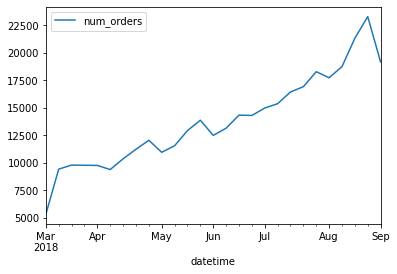

In [7]:
data_week = data.resample('1W').sum()
data_week.plot()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Графики в проекте нужно подписать.

Рекомендую их также несколько увеличить, чтобы рассмотрел их даже заказчик. Лучше всего, если все графики будут примерно одного удобного размера во всем проекте.
       
</div> 

Теперь можно сказать, что сервис успешен - число заказов растёт от месяца к месяцу. Однако, однозначного решения принять нельзя, т.к. данные есть лишь за полгода - возможно, просто попался "удачный" период. С помощью функции `seasonal_decompose()` разложим временной ряд на три составляющие: тренд, сезонность и остаток.

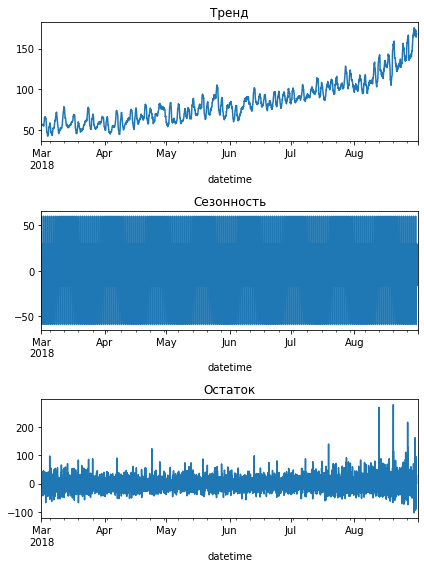

In [8]:
decomposed = seasonal_decompose(data['num_orders'], model='additive')

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остаток')
plt.tight_layout()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь уж точно нужно увеличить. Не то, чтобы у меня небольшой монитор, но хорошо, когда графики среднего удобного размера).
       
</div> 
  

Тренд растёт от месяца к месяцу, теперь изучим сезонность, для чего ресемплируем данные по одному дню.

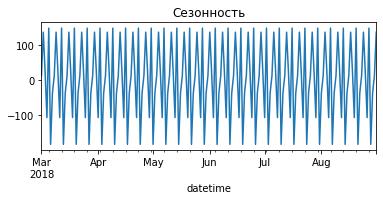

In [9]:
data_day = data.resample('1D').sum()

decomposed_day = seasonal_decompose(data_day['num_orders'], model='additive')

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed_day.seasonal.plot(ax=plt.gca())
plt.title('Сезонность');

Здесь заметны колебания раз в неделю - на выходных услугами такси пользуются реже.

Теперь найдём разности временного ряда.

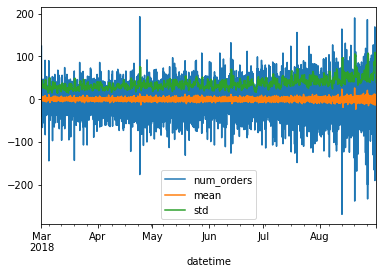

In [10]:
data_shifted = data - data.shift(fill_value=0)
data_shifted['mean'] = data_shifted['num_orders'].rolling(15).mean()
data_shifted['std'] = data_shifted['num_orders'].rolling(15).std()
data_shifted.plot();

После применения метода `.shift()` ряд стал более стационарным, а значит, его можно спрогнозировать.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В строгом смысле наш ряд не является стационарным, потому что имеет не только тренд, но еще и с августа - ускорение (квадратичный тренд). Дисперсия также непостоянна.
    
Однако есть методы, с помощью которых можно попытаться привести ряд к стационарному. Например, если возьмем разность временного ряда, то уберем тренд. Если применим преодразование Бокса-Кокса, то уберем неоднородность дисперсии. Можно взять разность по сезонности и уберем сезонность. 
    
Наши модели могут предсказывать ряд без всех этих преобразований. Делать преобразования нам не нужно. Можно просто протестировать, приводим ли наш ряд к стационарному. Часто в задачах ML ряд, приводимый к стационарному для простоты называют стационарным. Однако строго по определению он таковым не является.
    
Для определения стационарного ряда применяется тест Дики-Фуллера.
       
</div>


In [25]:
# код ревьювера
from statsmodels.tsa.stattools import adfuller

ts = data['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')



Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный
Наш ряд стационарный


## Обучение

In [11]:
# функция для построения моделей и их обучения (за исключением CatBoost, т.к. там приходится подбирать параметры)
def make_models(features, target, test):
    lin_model = LinearRegression()
    lin_model.fit(features, target)
    predicted_lin = lin_model.predict(features_test)
    
    ridge_model = Ridge()
    ridge_model.fit(features, target)
    predicted_ridge = ridge_model.predict(features_test)
    
    params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse',
        'max_depth': 6, 
        'learning_rate': 0.1,
        'verbose': 0
    }
    lgbm_model = LGBMRegressor(**params)
    lgbm_model.fit(features_train, target_train)
    predicted_lgbm = lgbm_model.predict(features_test)
    
    return predicted_lin, predicted_ridge, predicted_lgbm

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
На этапе исследования моделей тестовую выборку трогать не стоит. Если выделяем две выборки, то рекомендую здесь также использовать кросс-валидацию для определения качества модели.
    
Например, так:
    
```
%%time
#модель линейной регрессии
cv = TimeSeriesSplit(n_splits=3).split(features_train)
model_lr = LinearRegression() 
model_lr.fit(features_train, target_train)
score_lr = cross_val_score(model_lr, features_train, target_train, scoring='neg_mean_squared_error', cv=cv)
round(np.mean(-score_lr)**0.5, 2)
```

</div>



<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

К комментарию выше - а вообще-то функция нам пригодится, но как раз в тестировании. Предлагаю ее туда и переместить, чтобы двигаться в логике проекта.
       
</div> 

Нам понадобятся признаки:
* день - т.к. видна ежедневная сезонность
* день недели - т.к. к концу недели и в середине идёт увеличение заказов
* месяц - из месяца в месяц данные отличаются и носят цикличный характер

Поскольку год на протяжении всего набора данных один, он не влияет на результат и его можно не включать в признаки.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Можем ли «поймать» годовую сезонность? Важен ли месяц?
    
Наши календарные признаки подчеркивают сезонность. Относительно сезонности признаки идут на один уровень ниже. Если у нас суточная сезонность, то логично создавать признак часа (час одного дня похож на тот же час другого), если недельная - день недели.
    
Месяц нам был бы нужен, если бы была годовая сезонность. Что же касается тренда, то из признака месяца модель его не усвоит.
    
***
    
И напротив, выше изучили данные и увидели, что суточная сезонность достаточно сильная. Здесь нам будет важно выделить признак часа.


</div>


In [12]:
# функция для создания признаков
def make_features(data, max_lag, rolling_mean_size):
    # data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

Для определения lag найдём разницу в часах между максимальным пиком ночью и минимальным пиком в сезонном сегменте.
Для ширины окна rolling_mean проверим, какое окно в скользящем среднем лучше всего напоминает данные, для чего заполним словарь разными значениями rolling_mean_size и RMSE между скользящим средним и реальными данными на отрезке 30-31 августа (сутки у конца диапазона данных). После этого по минимальному значению RMSE в словаре найдём необходимое rolling_mean_size.

In [13]:
decomposed_data_24h = seasonal_decompose(data['2018-08-30':'2018-08-31'])
max_lag = ((decomposed_data_24h.seasonal.idxmax() - decomposed_data_24h.seasonal.idxmin()) 
            // np.timedelta64(1, 'h'))
max_lag

11

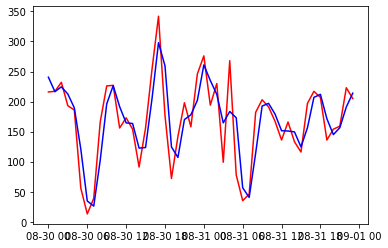

36.98915944796079


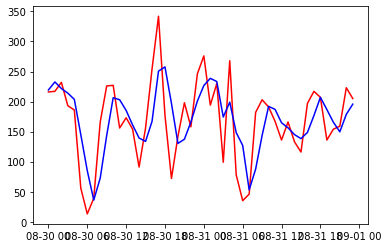

52.219666013088585


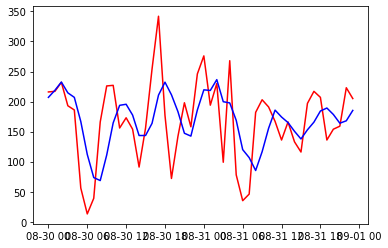

61.73457339354775


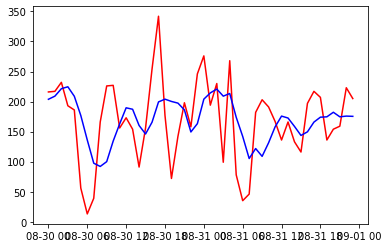

64.93109809636674


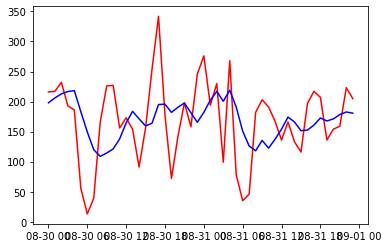

66.37807327055457


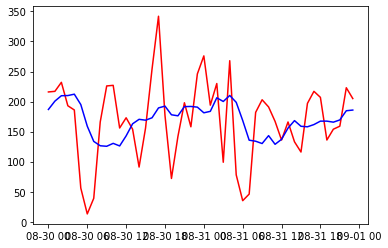

67.03321848868947


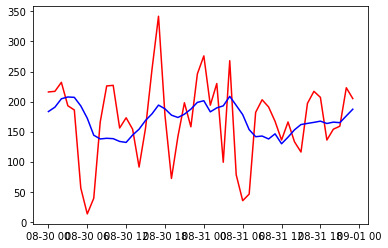

66.07711325287549


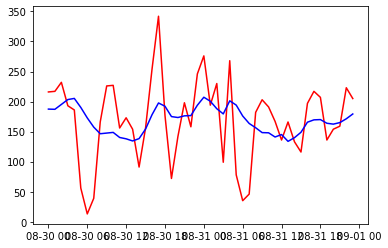

64.82589257184684


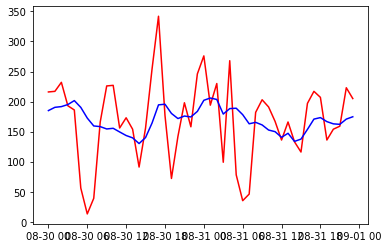

64.8972794113898


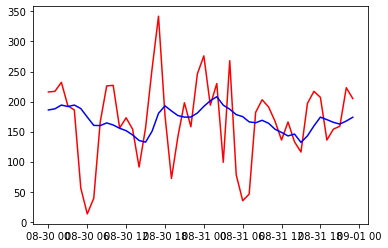

66.46865911561704


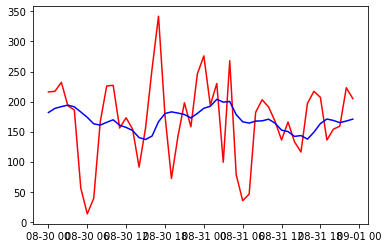

67.08032688225087


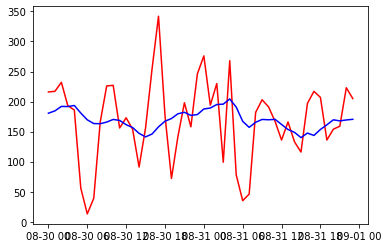

67.15206458558447


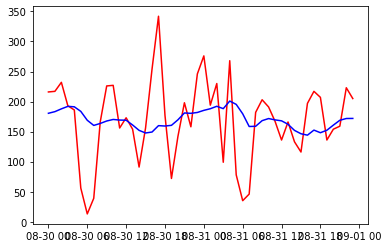

67.19811555909791


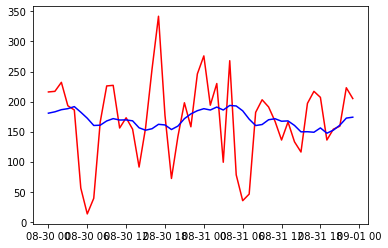

67.40505462418149


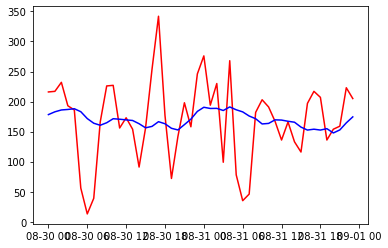

67.64638351844835


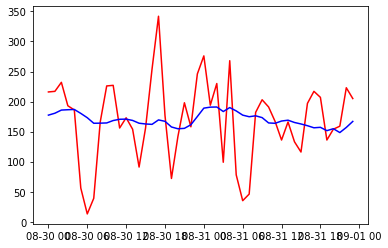

67.30413935385982


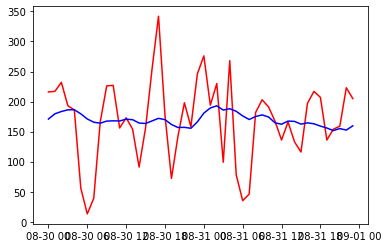

67.25874906755021


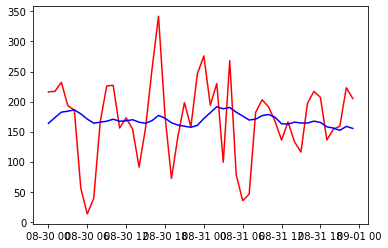

67.40076021022296


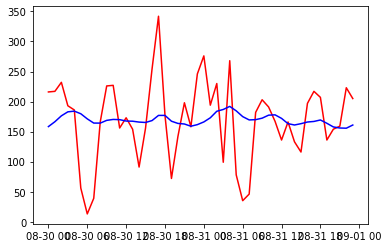

68.06754113562499


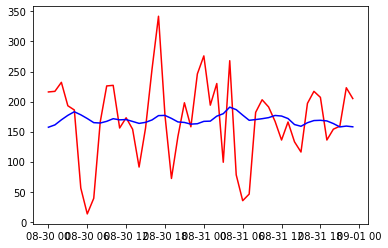

68.50024517062238


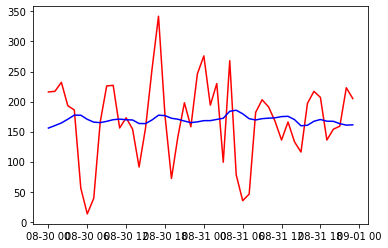

68.86388763830544


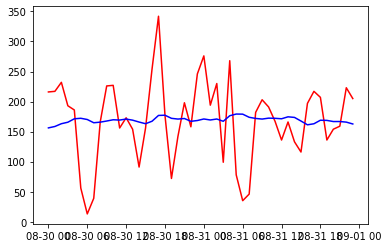

68.69392540482477


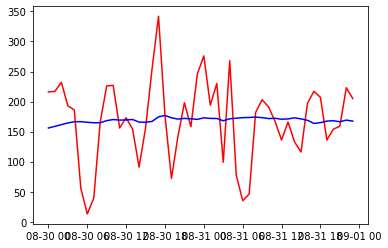

67.9081346890374


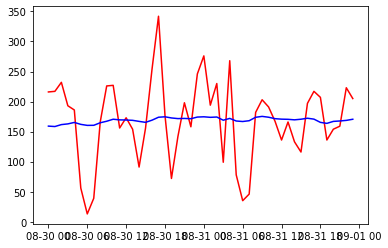

66.24640266962929


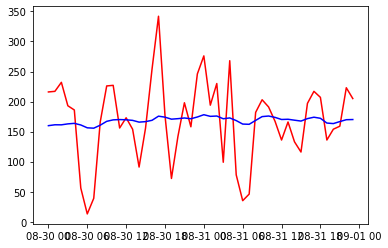

64.94040067471789


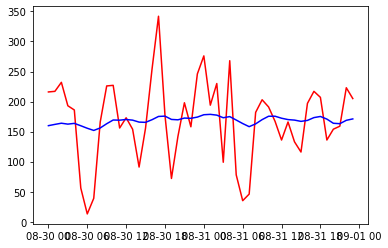

64.74053592079926


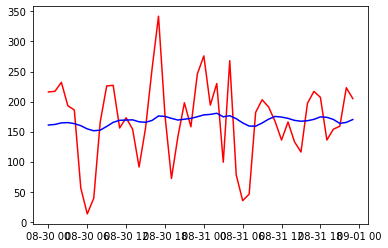

65.29951027126212


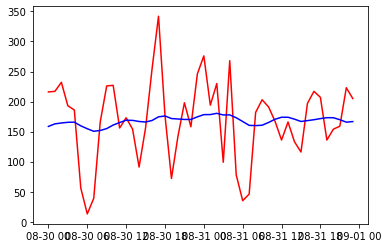

65.92793240429907


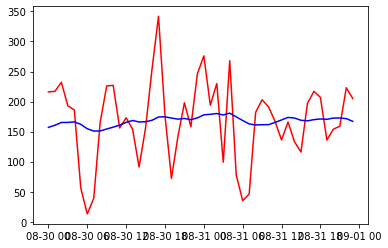

66.22491051823435


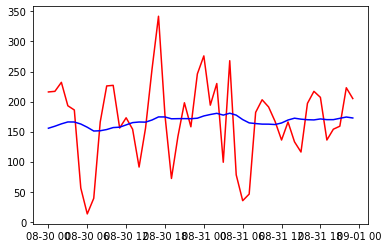

66.52620011521017


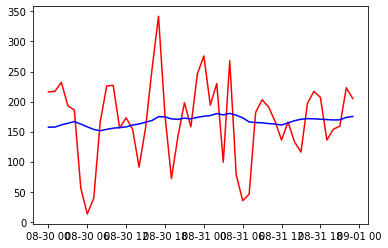

66.63293875417945


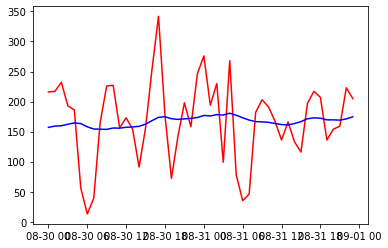

66.6363426787166


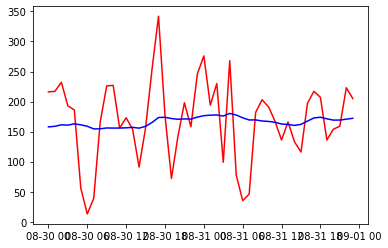

66.51722048759717


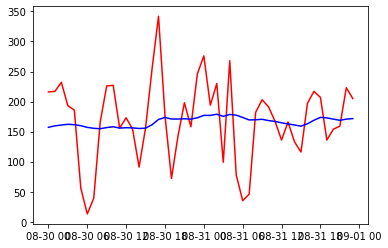

66.71273871460174


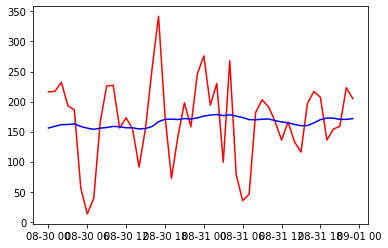

67.04084841995426


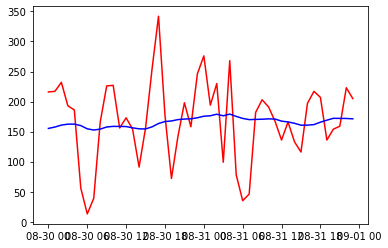

67.09860894970288


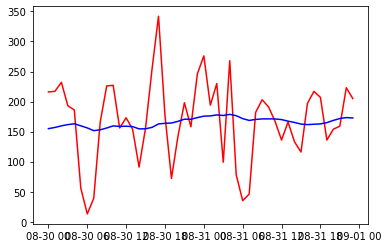

67.13110549015683


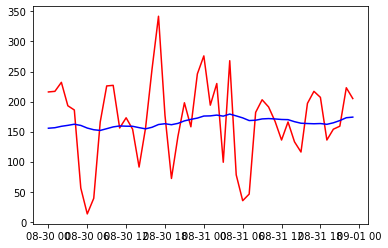

67.251912886346


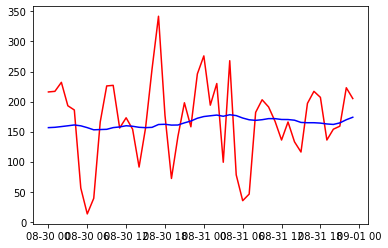

67.45894034753658


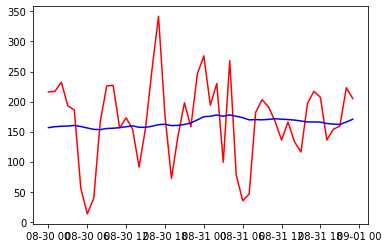

67.52952439254788


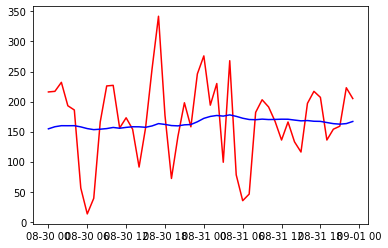

67.55013946081354


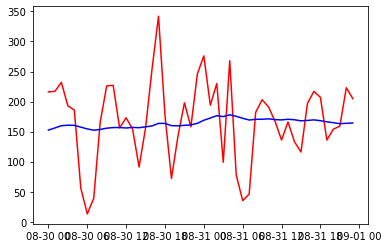

67.59716647500687


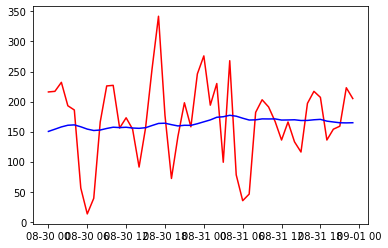

67.87760764412928


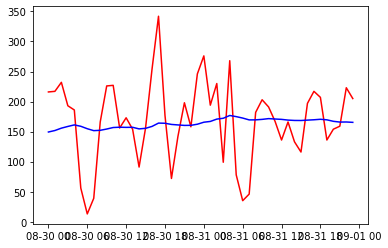

68.1627530646305


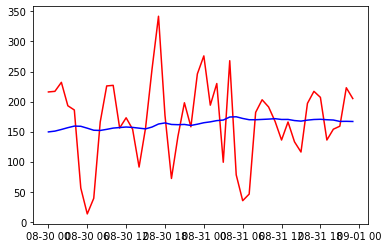

68.49865566432516


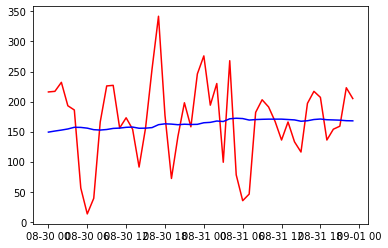

68.62075921700615


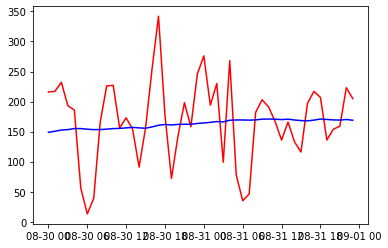

68.38335432597269


In [14]:
rolling_mean_size_dict = {}
for rolling_mean_size in range(2,49):
    data_copy = data['2018-08-30':'2018-08-31'].copy()
    data_copy['rolling_mean'] = data['num_orders'].rolling(rolling_mean_size).mean()
    data_copy.dropna(inplace=True)
    index = data_copy.index
    num_orders = data_copy['num_orders']
    rolling_mean = data_copy['rolling_mean']
    plt.plot(index,num_orders,'r-',index, rolling_mean,'b-')
    plt.show()
    RMSE = mean_squared_error(num_orders, rolling_mean)**0.5
    print(RMSE)
    rolling_mean_size_dict[rolling_mean_size] = RMSE

In [15]:
rolling_mean_size = min(rolling_mean_size_dict.keys(), key=(lambda x: rolling_mean_size_dict[x]))
rolling_mean_size

2

В функции для создания признаков будем использовать полученные переменные вместо стационарных значений.

In [16]:
make_features(data, max_lag, rolling_mean_size)
data.head()

,num_orders,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,rolling_mean
datetime,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.5
2018-03-01 03:00:00,66,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
2018-03-01 04:00:00,43,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.5


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
 
Хм, один из самых важных признаков в задаче временных рядов - это так называемые «лаги», то есть, значения предыдущих периодов наблюдения. Мы помним, что модель не считает по столбцам таблицы, она считает и подбирает веса к строкам нашего датасета. Соответственно, если мы хотим, чтобы модель предсказывала следующее значение, опираясь на предыдущие, нужно, чтобы она эти предыдущие значения увидела (по горизонтали нашего датасета). Нам важно создать новые колонки с отстающими значениями.
    
 Мы выше делали исследование и увидели, что у нас есть дневная и недельная сезонность. Соответственно, из лагов нам пригодится лаг предыдущего часа, того же и предыдущего часа предыдущего дня, недельной давности. Выбирать отдельно важные лаги не стоит - модель подберет веса и сделает это за нас, главное − подать достаточно этих самых лагов. Хотя бы 24.
    
Значимость лагов можно посмотреть по автокорреляции. Функция показывает, как признак коррелирует с предыдущими. Область синей заливки обозначает порог статистической значимости (если значение внутри, корреляция уже не заслуживает доверия. Статзначимость вычисляется по тесту Стьюдента).
</div>



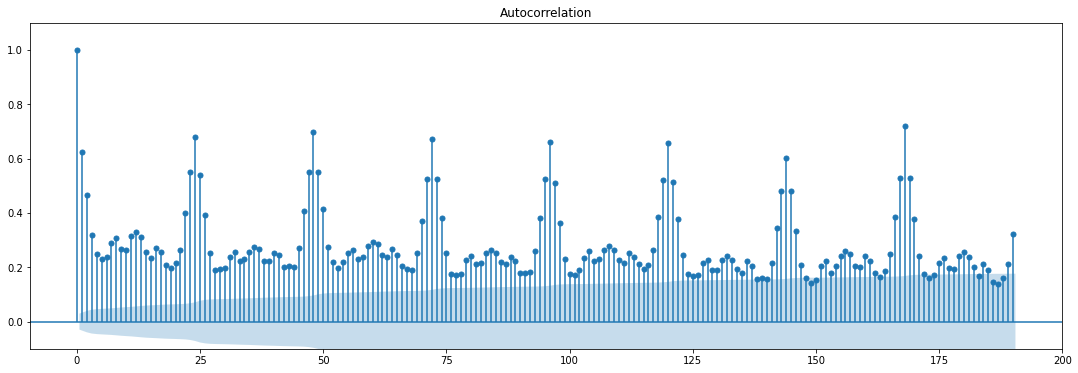

In [26]:
# Код ревьюера
from statsmodels.graphics import tsaplots

taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()
ts = taxi['num_orders']

fig = tsaplots.plot_acf(ts,lags= 190)
fig.set_size_inches(18.5, 6)
plt.ylim(-.1, 1.1)
plt.show() 


Функция `train_test_split` по умолчанию перемешивает данные, что нам в данном случае не нужно, поэтому добавим параметр `shuffle=False`.

После применения функции `make_features` у нас появились NaN-значения за счет сдвига данных. Их никак не заполнить, остаётся только удалить.

In [17]:
train, test = train_test_split(data, shuffle=False, test_size=0.2)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь важно, чтобы модель училась на актуальных данных. Поэтому на тестовую выборку будет достаточно заложить 10%. 20% - уже многовато.

</div>

Проверка, что данные не перемешались:

In [18]:
print(features_train.index[features_train.shape[0]-1])
print(features_test.index[0])

2018-07-26 03:00:00
2018-07-26 04:00:00


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Супер. Это важная проверка. Также можно проверить, что тестова выбора у нас идет после тренировочной.
</div>  


Порядок данных сохранён, что обязательно для предсказания временных рядов. Также создадим функцию для расчёта RMSE.

In [19]:
def rmse (target, predictions):
    mse = mean_squared_error(target, predictions)
    rmse = mse ** 0.5
    return rmse

Получаем предсказания моделей Linear, Ridge, LGBM по заданной ранее функции.

In [20]:
predicted_lin, predicted_ridge, predicted_lgbm = make_models(features_train, target_train, features_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.406537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

Находим iterations и depth для модели CatBoost.

In [21]:
for iteration in range(75, 151, 25):
    cat_model = CatBoostRegressor(loss_function='RMSE', iterations=iteration, depth=6, verbose=10)
    cat_cv = cross_val_score(cat_model, features_train, target_train, cv=3)
    print('Score при iterations =', iteration, ':', cat_cv)
    print('Score mean =', sum(cat_cv)/len(cat_cv))
    print()

Learning rate set to 0.384854
0:	learn: 32.6710546	total: 200ms	remaining: 14.8s
10:	learn: 25.8595508	total: 411ms	remaining: 2.39s
20:	learn: 23.5215341	total: 542ms	remaining: 1.39s
30:	learn: 21.4593426	total: 663ms	remaining: 941ms
40:	learn: 19.9065950	total: 956ms	remaining: 793ms
50:	learn: 18.6291063	total: 1.17s	remaining: 551ms
60:	learn: 17.5614647	total: 1.46s	remaining: 336ms
70:	learn: 16.5928920	total: 1.68s	remaining: 94.6ms
74:	learn: 16.3403046	total: 1.69s	remaining: 0us
Learning rate set to 0.384854
0:	learn: 31.9298848	total: 4.23ms	remaining: 313ms
10:	learn: 24.6046296	total: 299ms	remaining: 1.74s
20:	learn: 22.3310688	total: 593ms	remaining: 1.52s
30:	learn: 20.7070704	total: 888ms	remaining: 1.26s
40:	learn: 19.1659076	total: 1.09s	remaining: 904ms
50:	learn: 17.9583115	total: 1.12s	remaining: 525ms
60:	learn: 16.8405102	total: 1.15s	remaining: 263ms
70:	learn: 16.0753897	total: 1.17s	remaining: 66.1ms
74:	learn: 15.6445863	total: 1.18s	remaining: 0us
Learnin

120:	learn: 14.3710110	total: 530ms	remaining: 127ms
130:	learn: 13.9633688	total: 554ms	remaining: 80.4ms
140:	learn: 13.4283367	total: 578ms	remaining: 36.9ms
149:	learn: 12.9932695	total: 612ms	remaining: 0us
Score при iterations = 150 : [0.24941078 0.35288966 0.09646213]
Score mean = 0.232920858486768



<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>

По кросс-валидации. Мы здесь используем обычную кросс-валидацию, которая, соответственно, предсказывает нам будущее только в одном из n_splits случае, а в остальных − прошлое.
    
В случае с временным рядом нам нужно задать кросс-валидацию TimeSeriesSplit
    
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 
    
В случае временного ряда в каждом сплите тестовые индексы должны быть позже по времени, чем обучающие, поэтому перетасовка обычным способом неуместна. Как раз TimeSeriesSplit решает эту проблему.
    
Схематично работу можно представить вот так:\
</font>
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png)

А по реализации будет очень похоже на обычную кросс-валидацию:
```python
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X, y)
```
    
***
    
Гиперпараметры в кросс-валидации нужно задавать не в цикле, а отдельным словарем. Кросс-валидация как раз и состоит в том, что функция проходится по всем комбинациям в словаре.
    
Результаты нужно смотреть по best_score_
    
Ниже приведу несколько строк из кода, в таком виде ничего работать не будет, но это должно помочь в понимании, что и где определяем.
    
```

%%time 
    
hyperparams = [{'depth' : [3],
                'learning_rate' : [0.1],
                'iterations' : [100]
               }]


catbr = GridSearchCV(model_Cat, hyperparams, cv=tscv, scoring='neg_root_mean_squared_error')
catbr.fit(features_train, target_train)

print(catbr.best_score_)
print(catbr.best_params_)

    
```


</div>


In [22]:
for depth in range(1, 10, 2):
    cat_model = CatBoostRegressor(loss_function='RMSE', iterations=150, depth=depth, verbose=10)
    cat_cv = cross_val_score(cat_model, features_train, target_train, cv=3)
    print('Score при depth =', depth, ':', cat_cv)
    print('Score mean =', sum(cat_cv)/len(cat_cv))
    print()

Learning rate set to 0.219058
0:	learn: 34.5975804	total: 652us	remaining: 97.2ms
10:	learn: 31.2082443	total: 5.08ms	remaining: 64.3ms
20:	learn: 30.3992029	total: 9.53ms	remaining: 58.5ms
30:	learn: 29.8457407	total: 13.9ms	remaining: 53.5ms
40:	learn: 29.3994466	total: 18.2ms	remaining: 48.3ms
50:	learn: 29.0159141	total: 22.4ms	remaining: 43.6ms
60:	learn: 28.7443072	total: 26.7ms	remaining: 39ms
70:	learn: 28.5173732	total: 30.9ms	remaining: 34.4ms
80:	learn: 28.3256682	total: 35.9ms	remaining: 30.6ms
90:	learn: 28.1700547	total: 40.2ms	remaining: 26ms
100:	learn: 28.0342733	total: 45ms	remaining: 21.8ms
110:	learn: 27.9169257	total: 49.3ms	remaining: 17.3ms
120:	learn: 27.8141704	total: 53.7ms	remaining: 12.9ms
130:	learn: 27.7254543	total: 58ms	remaining: 8.41ms
140:	learn: 27.6546554	total: 62.6ms	remaining: 4ms
149:	learn: 27.5849725	total: 66.4ms	remaining: 0us
Learning rate set to 0.219058
0:	learn: 34.8170778	total: 503us	remaining: 75ms
10:	learn: 29.4738680	total: 4.99ms	

0:	learn: 33.8371419	total: 7.1ms	remaining: 1.06s
10:	learn: 26.8567205	total: 114ms	remaining: 1.44s
20:	learn: 24.4197736	total: 165ms	remaining: 1.01s
30:	learn: 22.8348448	total: 212ms	remaining: 815ms
40:	learn: 21.2002602	total: 256ms	remaining: 679ms
50:	learn: 20.1432488	total: 298ms	remaining: 579ms
60:	learn: 19.0260105	total: 341ms	remaining: 497ms
70:	learn: 18.1122754	total: 450ms	remaining: 500ms
80:	learn: 17.4622398	total: 545ms	remaining: 464ms
90:	learn: 16.4984978	total: 641ms	remaining: 416ms
100:	learn: 15.7191211	total: 741ms	remaining: 360ms
110:	learn: 15.3207334	total: 788ms	remaining: 277ms
120:	learn: 14.7791423	total: 883ms	remaining: 212ms
130:	learn: 14.1122801	total: 931ms	remaining: 135ms
140:	learn: 13.4663383	total: 980ms	remaining: 62.5ms
149:	learn: 12.9358814	total: 1.07s	remaining: 0us
Learning rate set to 0.219058
0:	learn: 33.6523506	total: 5.72ms	remaining: 852ms
10:	learn: 25.7151675	total: 116ms	remaining: 1.46s
20:	learn: 23.6547696	total: 2

Используем `iterations=100` и `depth=3`, т.к. они показали наилучший результат.

In [23]:
cat_model = CatBoostRegressor(loss_function='RMSE', iterations=100, depth=3, verbose=10)
cat_model.fit(features_train, target_train)
predicted_cat = pd.Series(cat_model.predict(features_test))

Learning rate set to 0.324753
0:	learn: 33.1380366	total: 1.24ms	remaining: 123ms
10:	learn: 27.6923662	total: 13.6ms	remaining: 110ms
20:	learn: 26.5819913	total: 24.8ms	remaining: 93.3ms
30:	learn: 25.6484841	total: 76.8ms	remaining: 171ms
40:	learn: 24.9021496	total: 88.7ms	remaining: 128ms
50:	learn: 24.3917170	total: 101ms	remaining: 96.7ms
60:	learn: 23.9278020	total: 112ms	remaining: 71.4ms
70:	learn: 23.5057316	total: 123ms	remaining: 50.3ms
80:	learn: 23.1369266	total: 134ms	remaining: 31.5ms
90:	learn: 22.7545448	total: 146ms	remaining: 14.5ms
99:	learn: 22.4663084	total: 156ms	remaining: 0us


 <div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Лучшую модель определили и описали - здесь все верно по структуре проекта.

Выводы необходимо будет перепроверить и синхронизировать с решениями по коду.
       
</div>

## Тестирование

Объединяем все предсказания в список и сравниваем его элементы с тестовой выборкой через написанную ранее функцию RMSE.

In [24]:
results = [predicted_lin, predicted_ridge, predicted_lgbm, predicted_cat]

for result in results:
    print(rmse(target_test, result))
    print('---')

47.43534572739726
---
47.43549159230617
---
52.384064651481
---
49.362166935497605
---


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Ага, здесь нормально смотрится функция, может, ее просто подвинуть к тестированию тогда?
</div>  
    
     


## Вывод

Несмотря на подбор гиперпараметров для модели CatBoostRegressor, лучший результат (минимальный RMSE) показала модель обычной линейной регрессии. Как прототип сервису такси можно советовать её.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Если добавим много лагов, то лучшей может стать и другая модель. Рекомендую все перепроверить :)
    
***

Здесь также можно было бы добавить проверку модели на адекватность. В случае с временными рядами модель будет предсказывать следующее значение предыдущим:


`pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]`

</div>





<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проверке**

У тебя получился хороший проект. Неплохой выбор моделей для обучения, достаточно подробная исследовательская часть. Однако есть и что доработать:
    
* Важно создавать все полезные признаки и не создавать лишних.
* Необходимо увеличить количество лагов.
* На тестовую выборку достаточно заложить 10% данных. 20% - уже многовато.
* Кросс-валидацию нужно реализовать для всех моделей и использовать схему tscv. Циклы нам не нужны, если используем две выборки.


**Желаю удачи и жду твой проект на повторное ревью!**😉

</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48